In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.linalg
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:,.2f}'.format

In [42]:
df = pd.read_csv("Data3.csv")
df

,U0,I,U
0,12.12,0.25,12.12
1,12.12,0.50,12.11
2,12.12,0.75,12.09
3,12.12,1.00,12.08
4,12.12,1.25,12.07
5,12.12,1.50,12.05
6,12.12,1.75,12.04
7,12.12,2.00,12.03
8,4.50,0.10,4.30
9,4.50,0.20,3.90


In [43]:
expData = df[df.U0 == 12.12]
batteryData = df[df.U0 == 4.5]

In [44]:
expData

,U0,I,U
0,12.12,0.25,12.12
1,12.12,0.50,12.11
2,12.12,0.75,12.09
3,12.12,1.00,12.08
4,12.12,1.25,12.07
5,12.12,1.50,12.05
6,12.12,1.75,12.04
7,12.12,2.00,12.03


In [45]:
basis = np.vstack((expData.I,np.ones(len(expData)))).T
koef = scipy.linalg.lstsq(basis, expData.U)[0]
print(koef)

[-0.05190476 12.13264286]


In [46]:
x0 = -koef[1]/koef[0]
print(x0)

233.74816513762258


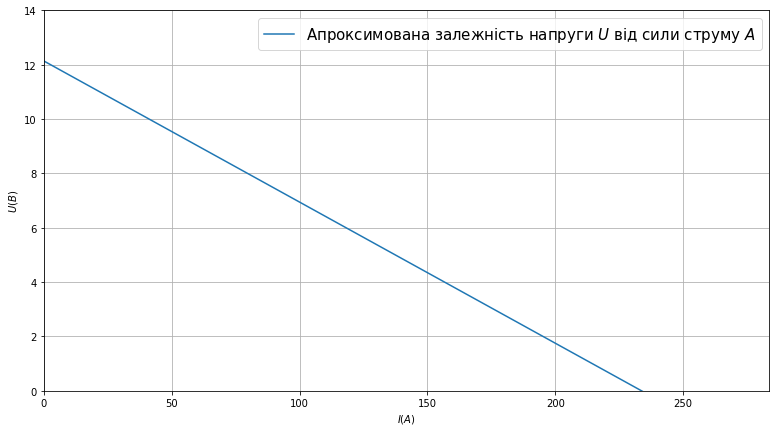

In [47]:
plt.figure(figsize = (13,7))
plt.ylabel("$U(В)$")
plt.rc('font', size=15)
plt.xlabel("$I(A)$")
plt.grid();


x = np.arange(0, x0 + 1,0.01)
y = koef[0] * x + koef[1]

plt.xlim(0,x0 + 50)
plt.ylim(0, 14)

plt.plot(x, y, '-', label = r"Апроксимована залежність напруги $U$ від сили струму $А$")
plt.legend(loc="best");

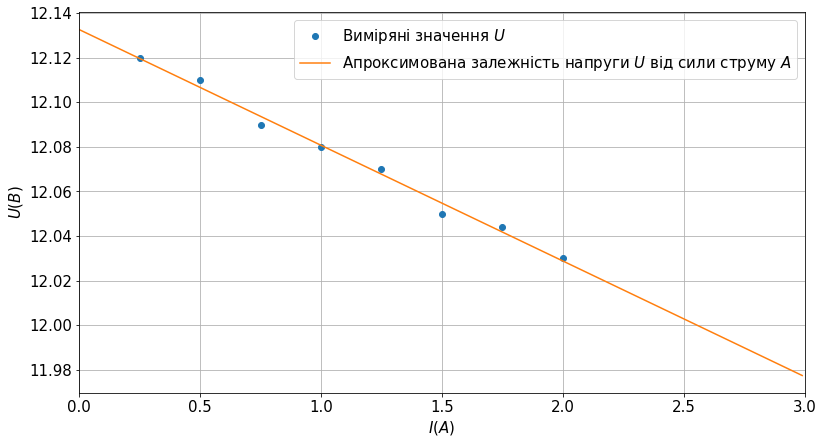

In [48]:
plt.figure(figsize = (13,7))
plt.ylabel("$U(В)$")
plt.rc('font', size=15)
plt.xlabel("$I(A)$")
plt.grid();


x = np.arange(0, max(expData.I) + 1,0.01)
y = koef[0] * x + koef[1]

plt.xlim(0,3)

plt.plot(expData.I, expData.U, 'o', label = r"Виміряні значення $U$")
plt.plot(x, y, '-', label = r"Апроксимована залежність напруги $U$ від сили струму $А$")
plt.legend(loc="best");
plt.savefig("exp.png")

In [49]:
batteryData

,U0,I,U
8,4.50,0.10,4.30
9,4.50,0.20,3.90
10,4.50,0.30,3.70
11,4.50,0.40,3.30
12,4.50,0.50,2.90
13,4.50,0.60,2.70
14,4.50,0.75,2.25


In [50]:
batteryData['Re'] = batteryData.apply(lambda row: row['U'] / row['I'], axis=1)
batteryData['Ri'] = batteryData.apply(lambda row: (row['U0'] - row['I']*row['Re']) / row['I'], axis=1)
batteryData['Pi'] = batteryData.apply(lambda row: row['I']**2 * row['Ri'], axis=1)
batteryData['Pe'] = batteryData.apply(lambda row: row['I']**2 * row['Re'], axis = 1)
batteryData['P0'] = batteryData.apply(lambda row: row['U0']**2 / row['Ri'], axis = 1)
batteryData['Iz'] = batteryData.apply(lambda row: row['U0'] / row['Ri'], axis = 1)
batteryData['Pe0'] = batteryData.apply(lambda row: row['Pe'] / row['P0'], axis = 1)
batteryData['Pi0'] = batteryData.apply(lambda row: row['Pi'] / row['P0'] , axis = 1)
batteryData['PP0'] = batteryData.apply(lambda row: (row['Pi'] + row['Pe']) / row['P0'] , axis = 1)
batteryData['n'] = batteryData.apply(lambda row: (row['Pi'] + row['Pe']) / row['P0'] * 100, axis = 1)
batteryData

,U0,I,U,Re,Ri,Pi,Pe,P0,Iz,Pe0,Pi0,PP0,n
8,4.50,0.10,4.30,43.00,2.00,0.02,0.43,10.12,2.25,0.04,0.00,0.04,4.44
9,4.50,0.20,3.90,19.50,3.00,0.12,0.78,6.75,1.50,0.12,0.02,0.13,13.33
10,4.50,0.30,3.70,12.33,2.67,0.24,1.11,7.59,1.69,0.15,0.03,0.18,17.78
11,4.50,0.40,3.30,8.25,3.00,0.48,1.32,6.75,1.50,0.20,0.07,0.27,26.67
12,4.50,0.50,2.90,5.80,3.20,0.80,1.45,6.33,1.41,0.23,0.13,0.36,35.56
13,4.50,0.60,2.70,4.50,3.00,1.08,1.62,6.75,1.50,0.24,0.16,0.40,40.00
14,4.50,0.75,2.25,3.00,3.00,1.69,1.69,6.75,1.50,0.25,0.25,0.50,50.00


In [51]:
basis = np.vstack((batteryData.I,np.ones(len(batteryData)))).T
koef = scipy.linalg.lstsq(basis, batteryData.U)[0]
print(koef)

[-3.1624714   4.58043478]


In [52]:
x0 = -koef[1]/koef[0]
print(x0)

1.4483719247467446


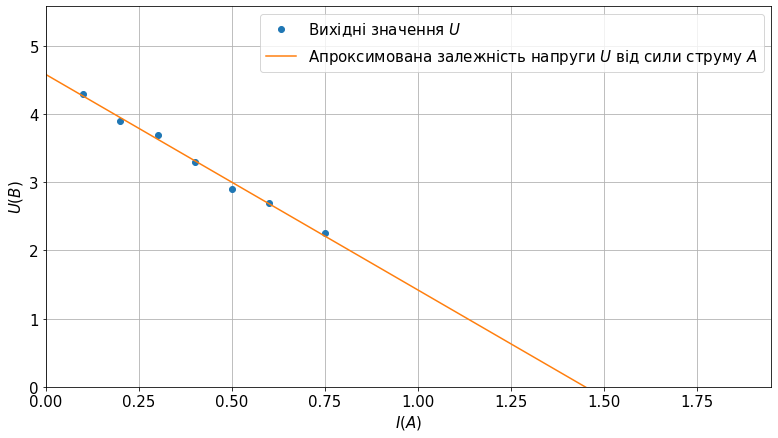

In [53]:
plt.figure(figsize = (13,7))
plt.ylabel("$U(В)$")
plt.rc('font', size=15)
plt.xlabel("$I(A)$")
plt.grid();


x = np.arange(0, x0 + 1,0.01)
y = koef[0] * x + koef[1]

#plt.axis('scaled')
plt.xlim(0,x0 + 0.5)
plt.ylim(0, np.max(y) + 1)

plt.plot(batteryData.I, batteryData.U, 'o', label = r"Вихідні значення $U$")
plt.plot(x, y, '-', label = r"Апроксимована залежність напруги $U$ від сили струму $А$")
plt.legend(loc="best");
plt.savefig('battery.png')

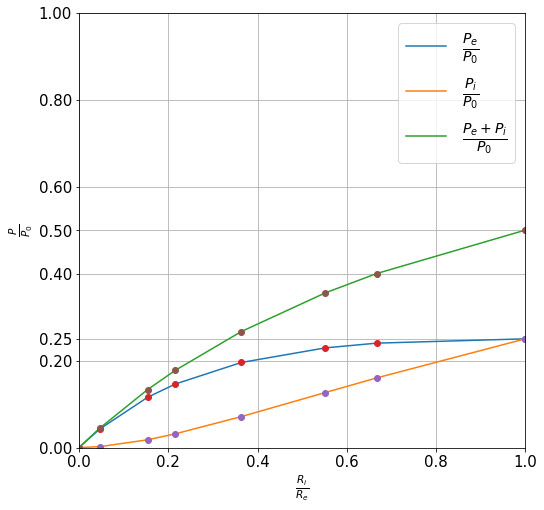

In [54]:
plt.figure(figsize = (8,8))
plt.ylabel(r"$\frac{P}{P_0}$")
plt.rc('font', size=20)
plt.xlabel(r"$\frac{R_i}{R_e}$")
plt.grid();


#plt.axis('scaled')
plt.xlim(left=0)
plt.ylim(0, np.max(batteryData['PP0'])+ 0.5)

from scipy.interpolate import make_interp_spline, BSpline

plt.yticks([0, 0.2, 0.25, 0.4, 0.5, 0.6, 0.8, 1])

x = [0]
y = [0]
z = [0]
u = [0]
x = np.append(x, batteryData.apply(lambda row: row['Ri'] / row['Re'], axis = 1))
y = np.append(y, batteryData['Pe0'])
z = np.append(z, batteryData['Pi0'])
u = np.append(u, batteryData['PP0'])

#plt.plot(batteryData.I, batteryData.U, 'o', label = r"Вихідні значення $U$")
plt.plot(x, y, '-', label = r"$\frac{P_e}{P_0}$")
plt.plot(x, z, '-', label = r"$\frac{P_i}{P_0}$")
plt.plot(x, u, '-', label = r"$\frac{P_e+P_i}{P_0}$")
plt.plot(x, y, 'o')
plt.plot(x, z, 'o')
plt.plot(x, u, 'o')
plt.legend(loc="best");
plt.savefig('p.png')

In [55]:
print(x)

[0.         0.04651163 0.15384615 0.21621622 0.36363636 0.55172414
 0.66666667 1.        ]
